DESCRIPTION

MNIST is a dataset of images with 10 classes and each image is 28*28 pixel. Build a classification model with the given dataset.

Objective: Build a deep learning classification model using deep learning framework, Keras.

#### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



---



In [2]:
# Load the data from keras's datasets
# mnist dataset has 60000 images in train data and 10000 images in test data.
# Each image is 28 * 28 pixel. The images are handwritten digits from 0 to 9, so totally 10 classes.
# This is a multi class classification problem.
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Display the first image and its corresponding label.

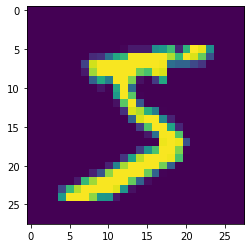

5


In [3]:
# The first image is handwriiten digit "5" and its corresponding label is "5".
plt.imshow(x_train_full[0])
plt.show()
print(y_train_full[0])

Next step is splitting the train data into train and validation data. We donot want to use the test data for validation, as the system will be biased. 

We take first 5000 records for validation and the remaining 55000 records for training.

In [4]:
# Scale and split the training data values (X) into training and validation subsets
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
# Split the images training class values (y), 0-9, into same training and validation subsets
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
# Scale all the X_test values
X_test = x_test / 255.0

### Print the shape of the data

In [5]:
print(x_train.shape)
print(x_test.shape)


(55000, 28, 28)
(10000, 28, 28)



### Build the model
Build a sequential model. The first layer flattens the input data ie.convert each input image into a 1D array.
Since it is the first layer in the model, we specify the input_shape: this does not include the batch size, only the shape of the instances. 

The 2nd and 3rd layers are the hidden layers and they use activation function 'relu'. The last layer is output layer. Since its a 10 class classification model, we give "10" for the output layer and use softmax.

In [6]:
num_classes = 10 # output will be one of digits 0 to 9
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28], name='Flatten'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(13, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 12)                9420      
                                                                 
 dense_1 (Dense)             (None, 13)                169       
                                                                 
 dense_2 (Dense)             (None, 10)                140       
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


Model Summary shows the no.of layers and no.of parameters in each layer. Since first layer is input layer, the no.of parameters is 0. The second layer has 784 times 12 weights and 12 biases which adds up to 9420. 
Third layer--> 12 times 13 + 13 = 169.
 Output layer----> 13 times 10 + 10 = 140.

### Compile the model

After a model is created, we call compile() method to specify the loss function and the optimizer to use.

We use 'sgd' (Stochastic Gradient Descent) for optimizer and sparse_categorical_crossentropy as the loss function. 
Since we are using sparse_categorical_crossentropy, the labels must be provided as integers. So, no need to one hot encode the values.
One hot encoding is needed only for categorical_crossentropy.

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Fit the model

The model is ready to be trained. For this we call its fit() method. We pass the input features (x_train) and the target classes (y_train), epochs and validation set. 

In [8]:
history = model.fit(x_train, y_train,                    
                    epochs=50,                   
                    validation_data=(x_valid, y_valid))


Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0624 - accuracy: 0.6684 - val_loss: 0.4949 - val_accuracy: 0.8614
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4412 - accuracy: 0.8755 - val_loss: 0.3764 - val_accuracy: 0.8946
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3711 - accuracy: 0.8950 - val_loss: 0.3400 - val_accuracy: 0.9026
Epoch 4/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3372 - accuracy: 0.9047 - val_loss: 0.3146 - val_accuracy: 0.9112
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3162 - accuracy: 0.9100 - val_loss: 0.3012 - val_accuracy: 0.9160
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3021 - accuracy: 0.9131 - val_loss: 0.2887 - val_accuracy: 0.9200
Epoch 7/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2905 - accuracy: 0.9163 - val_loss: 0.2793 - val_accuracy:

In [9]:
# Evaluate the model on the test data. 
# The accuracy score is 94.79 percent.
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9417


[0.19902101159095764, 0.9416999816894531]

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

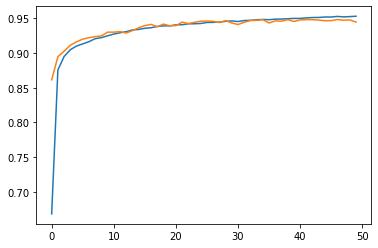

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

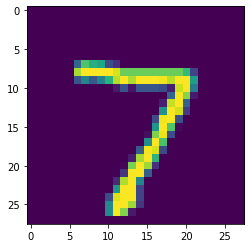

7


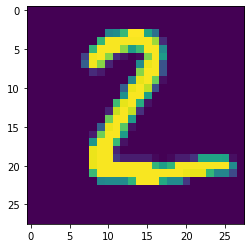

2


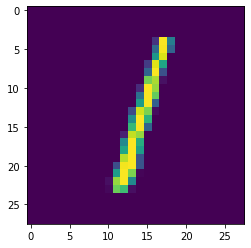

1


In [12]:
# Test the model and see if the predictions are correct.
# Below example, the model predicted all 3 images correctly (digits 7,2,1)
x_new = x_test[0:3]
y_pred = model.predict(x_new)
y_pred = (np.argmax(y_pred, axis=1))
plt.imshow(x_new[0])
plt.show()
print(y_pred[0])

plt.imshow(x_new[1])
plt.show()
print(y_pred[1])

plt.imshow(x_new[2])
plt.show()
print(y_pred[2])
